In [39]:
# 首先导入pandas用于数据读取和处理，TransactionEncoder用于将事务数据转换为布尔矩阵。
# 使用try - except块读取数据集Market_Basket_Optimisation.csv，如果文件未找到则提示错误。
# 通过循环遍历每一行数据，将非空值提取出来组成列表，存储在records中。
# 使用TransactionEncoder对records进行编码，得到布尔矩阵并转换为DataFrame，列名即为各个商品名称。

In [40]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder


# 读取数据集
try:
    data = pd.read_csv('Market_Basket_Optimisation.csv')
except FileNotFoundError:
    print("数据集文件未找到，请检查文件名和路径。")


# 将每一行数据转换为列表形式，去除空值
records = []
for i in range(len(data)):
    row = [value for value in data.iloc[i].values if pd.notnull(value)]
    records.append(row)


# 使用TransactionEncoder进行编码
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns = te.columns_)

In [41]:
# 导入apriori和association_rules函数用于生成频繁项集和提取关联规则。
# 使用apriori函数生成频繁项集，min_support设置为 0.05，use_colnames = True使用商品名称作为项集标识。
# 通过association_rules函数从频繁项集中提取关联规则，metric ="confidence"以置信度为评估指标，min_threshold = 0.5设置最小置信度。
# 根据提升度大于 2.0 筛选出高提升度规则。
# 分别打印 Apriori 算法生成的频繁项集、所有关联规则以及高提升度的关联规则。

In [42]:
from mlxtend.frequent_patterns import apriori


# 生成频繁项集，设置最小支持度为0.05
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames = True)


# 展示频繁项集
print("频繁项集：")
print(frequent_itemsets)

频繁项集：
     support                    itemsets
0   0.087200                   (burgers)
1   0.081067                      (cake)
2   0.060000                   (chicken)
3   0.163867                 (chocolate)
4   0.080400                   (cookies)
5   0.051067               (cooking oil)
6   0.179733                      (eggs)
7   0.079333                  (escalope)
8   0.170933              (french fries)
9   0.063200           (frozen smoothie)
10  0.095333         (frozen vegetables)
11  0.052400             (grated cheese)
12  0.132000                 (green tea)
13  0.098267               (ground beef)
14  0.076400            (low fat yogurt)
15  0.129600                      (milk)
16  0.238267             (mineral water)
17  0.065733                 (olive oil)
18  0.095067                  (pancakes)
19  0.071333                    (shrimp)
20  0.050533                      (soup)
21  0.174133                 (spaghetti)
22  0.068400                  (tomatoes)
23  0.0625

In [43]:
# 从频繁项集提取关联规则
# 基于生成的频繁项集，通过设定最小置信度，提取关联规则，并筛选出高提升度的规则。

In [44]:
from mlxtend.frequent_patterns import association_rules


# 提取关联规则，设置最小置信度为0.5
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 0.5)


# 筛选高提升度规则，提升度大于2.0
high_lift_rules = rules[rules["lift"] > 2.0]


# 展示关联规则
print("\n关联规则：")
print(rules)


# 展示高提升度关联规则
print("\n高提升度关联规则：")
print(high_lift_rules)


关联规则：
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

高提升度关联规则：
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [45]:
# 相关性分析 - 提升度热力图
# 通过对关联规则数据进行处理，绘制提升度热力图来直观展示商品之间的关联强度。

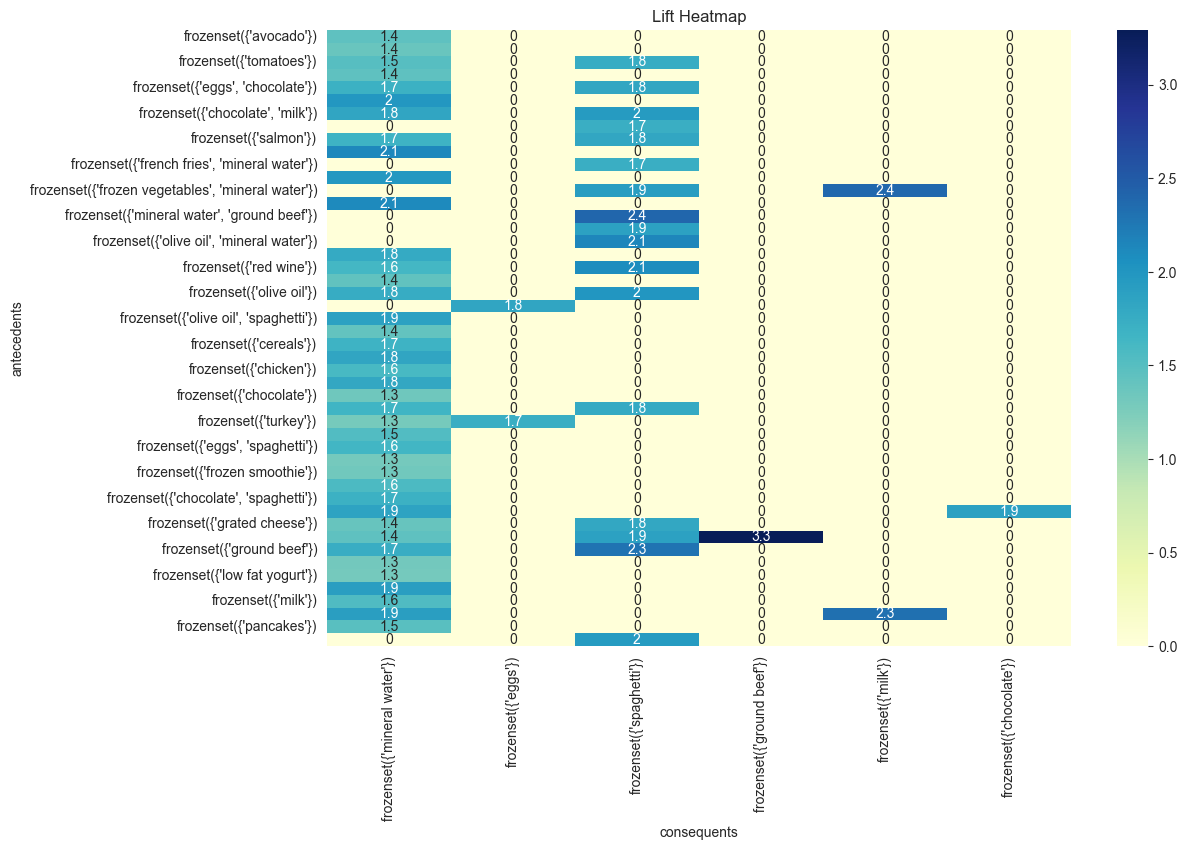

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 将每一行数据转换为列表形式，去除空值和空字符串
records = []
for i in range(len(data)):
    row = [value for value in data.iloc[i].values if pd.notnull(value) and value!= '']
    records.append(row)
    # 生成频繁项集，设置最小支持度为0.01
frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True)
# 提取关联规则，设置最小置信度为0.3
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 0.3)
# 将关联规则数据进行透视，以antecedents为行，consequents为列，lift值为数据填充
rules_pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')


# 创建一个大小为(12, 8)的图形
plt.figure(figsize=(12, 8))


# 使用seaborn的heatmap函数绘制热力图，填充0处理缺失值，annot=True显示数值，cmap='YlGnBu'指定颜色映射
sns.heatmap(rules_pivot.fillna(0), annot=True, cmap='YlGnBu')
plt.title('Lift Heatmap')
plt.show()

In [47]:
# 挖掘不同支持度和置信度下的结果并可视化
# 此部分代码通过循环遍历不同的支持度和置信度值，分别计算频繁项集和关联规则，并绘制出支持度 - 频繁项集数量、置信度 - 关联规则数量的关系图，帮助理解参数对结果数量的影响。

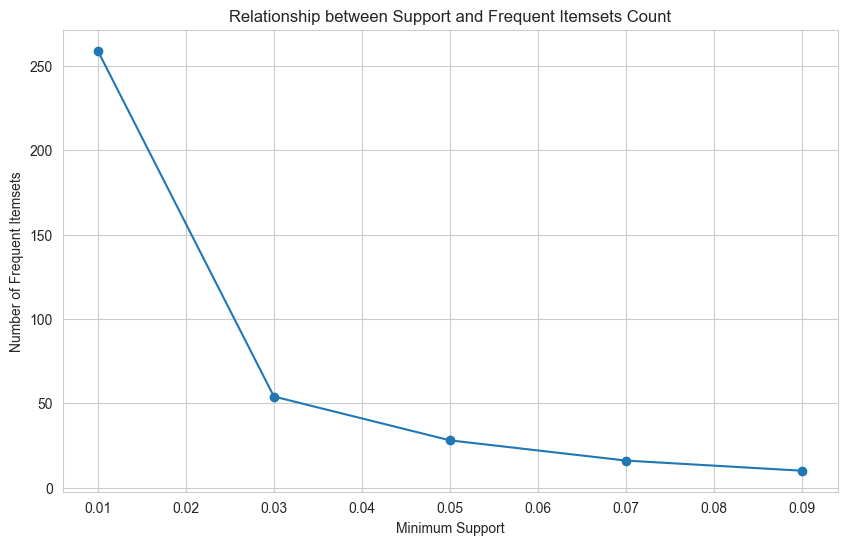

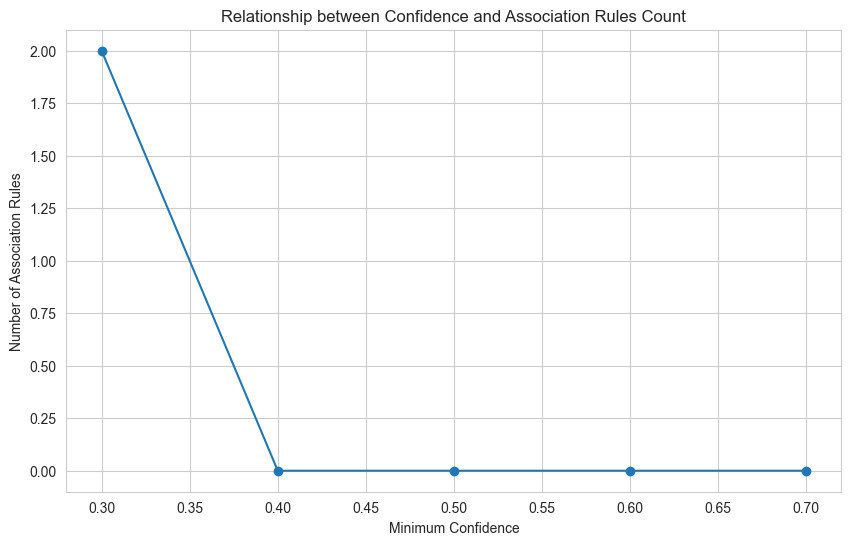

In [48]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


# 读取数据集
try:
    data = pd.read_csv('Market_Basket_Optimisation.csv')
except FileNotFoundError:
    print("数据集文件未找到，请检查文件名和路径。")


# 将每一行数据转换为列表形式，去除空值和空字符串
records = []
for i in range(len(data)):
    row = [value for value in data.iloc[i].values if pd.notnull(value) and value!= '']
    records.append(row)


# 使用TransactionEncoder进行编码
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns = te.columns_)


# 不同支持度下的频繁项集数量
support_values = [0.01, 0.03, 0.05, 0.07, 0.09]
frequent_itemsets_count = []
for support in support_values:
    frequent_itemsets = apriori(df, min_support = support, use_colnames = True)
    frequent_itemsets_count.append(len(frequent_itemsets))


# 绘制支持度 - 频繁项集数量图
plt.figure(figsize=(10, 6))
plt.plot(support_values, frequent_itemsets_count, marker='o')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Relationship between Support and Frequent Itemsets Count')
plt.grid(True)
plt.show()


# 不同置信度下的关联规则数量
confidence_values = [0.3, 0.4, 0.5, 0.6, 0.7]
association_rules_count = []
for confidence in confidence_values:
    frequent_itemsets = apriori(df, min_support = 0.05, use_colnames = True)
    rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = confidence)
    association_rules_count.append(len(rules))


# 绘制置信度 - 关联规则数量图
plt.figure(figsize=(10, 6))
plt.plot(confidence_values, association_rules_count, marker='o')
plt.xlabel('Minimum Confidence')
plt.ylabel('Number of Association Rules')
plt.title('Relationship between Confidence and Association Rules Count')
plt.grid(True)
plt.show()


In [49]:
# 找出最频繁的单个商品和商品对
# 此代码段通过对频繁项集的分析，找出支持度最高的单个商品和商品对，帮助了解哪些商品或商品组合在数据集中出现的频率最高。

In [50]:
# 找出最频繁的单个商品
single_item_frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
most_frequent_single_item = single_item_frequent_itemsets.sort_values(by='support', ascending=False).iloc[0]
print("最频繁的单个商品:")
print(most_frequent_single_item)


# 找出最频繁的商品对
pair_item_frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
most_frequent_pair_item = pair_item_frequent_itemsets.sort_values(by='support', ascending=False).iloc[0]
print("\n最频繁的商品对:")
print(most_frequent_pair_item)


最频繁的单个商品:
support            0.238267
itemsets    (mineral water)
Name: 16, dtype: object

最频繁的商品对:
support                       0.059733
itemsets    (spaghetti, mineral water)
Name: 27, dtype: object


In [51]:
# 根据提升度找出强关联的商品规则并保存为文件
# 该部分代码根据提升度筛选出强关联的商品规则，并将这些规则保存到一个文本文件中，方便后续查看和分析。

In [52]:
# 根据提升度找出强关联的商品规则（提升度 > 3）
strong_rules = rules[rules['lift'] > 3]


# 将强关联规则保存到文件
with open('strong_association_rules.txt', 'w', encoding='utf - 8') as file:
    file.write('前件\t后件\t支持度\t置信度\t提升度\n')
    for index, row in strong_rules.iterrows():
        antecedents = ', '.join(map(str, list(row['antecedents'])))
        consequents = ', '.join(map(str, list(row['consequents'])))
        support = row['support']
        confidence = row['confidence']
        lift = row['lift']
        file.write(f'{antecedents}\t{consequents}\t{support}\t{confidence}\t{lift}\n')
